In [1]:
import numpy as np
import cv2 as cv

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Convolution2D,Flatten,Dense


In [2]:
data = np.load('final_data.npy')

img = data[0]
steering = data[1]

x_train,x_test,y_train,y_test = train_test_split(img,steering,test_size = 0.2)

In [18]:
#steering  = []
#images = []

#for i in data :
    #images.append(i[0])
    #steering.append(i[3])

In [19]:
#def crop_img(path):   
    
   # img = cv.imread(imgs[0])
   # crop = img[60:138,:,:]    # top :bottom, 
    #return crop

#hsv = cv.cvtColor(crop,cv.COLOR_BGR2HSV) for greyscale
#def bgr2yuv(crop):
     #yuv = cv.cvtColor(crop,cv.COLOR_BGR2YUV)
     #return yuv

In [20]:
#crop = crop_img('D:\\STUDY\\AUTONOMOUS\\DRIVE\\IMG\\center_2021_05_22_12_41_33_391.jpg')

#yuv = bgr2yuv(crop)
#plt.imshow(yuv)

In [21]:
#yuv = bgr2yuv(crop)
#plt.imshow(yuv)

In [22]:
#brightness_cont = np.random.randint(1,4)  #low  to high

#plt.imshow(yuv//brightness_cont)

In [23]:
#img = cv.imread('D:\\STUDY\\AUTONOMOUS\\DRIVE\\IMG\\center_2021_05_22_12_41_33_391.jpg')
#plt.imshow(img)
#float(steering[391])

In [24]:
#flip = cv.flip(img,1)  #to flip horizintal 0,flip vertical 1
#plt.imshow(flip)

#-float(steering[391])  #steering angle reversed

# AUGMENTATION

In [3]:
def batch_generator(imgs,steering,batch_size): 
    
   
    
    while True:                                        #will run till no of batches
        
        x = []
        y = []
        
        for i in range(batch_size):                   # size if given 50 then 50 imgs will assign and loop 50 times    
    
            index = np.random.randint(0,len(imgs)-1)  #coz 0 se indexing will start
            img = cv.imread(imgs[index])
            
            img = cv.cvtColor(img,cv.COLOR_BGR2YUV) #or img = bgr2yuv()
            img = img[60:138,:,:]                   #or img = crop_img(img)
            
            img = cv.resize(img,(200,66))
        
            if(np.random.rand() > 0.5):
    
                brightness_cont = np.random.randint(1,4)
                img = img//brightness_cont
    
            if(np.random.rand() > 0.5):   
    
                img = cv.flip(img,1)
                steering_angle = -float(steering[index])
        
            else:
                steering_angle = float(steering[index])
    
            x.append(img)
            y.append(steering_angle)
        
        x = np.array(x)                            #converting to numpy array
        y = np.array(y)
        
        yield x,y                                  #will return values and run indefinitly

TypeError: Image data of dtype <U64 cannot be converted to float

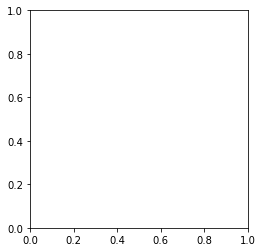

In [5]:
plt.imshow(img)

In [6]:
model = Sequential()                               #66 height x 200 width with 3 channel

model.add(Convolution2D(24,(5,5),strides = (2,2), input_shape = (66,200,3),activation = 'elu'))  #how many pixel to shift kernal is strides
model.add(Convolution2D(36,(5,5),strides = (2,2), activation = 'elu'))
model.add(Convolution2D(48,(5,5),strides = (2,2), activation = 'elu'))

model.add(Convolution2D(64,(3,3), activation = 'elu'))
model.add(Convolution2D(64,(3,3), activation = 'elu'))

model.add(Flatten())  #to convert 2d to 1d

model.add(Dense(100,activation = 'elu'))           #100 neurons
model.add(Dense(50,activation = 'elu'))
model.add(Dense(10,activation = 'elu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               1

In [11]:
history = model.fit(batch_generator(x_train, y_train, 181), steps_per_epoch = 300, epochs = 10,
           validation_data = batch_generator(x_test,y_test,181),validation_steps = 200)

Epoch 1/10
300/300 [==============================] - 261s 867ms/step - loss: 1.4041 - accuracy: 0.2762 - val_loss: 0.1444 - val_accuracy: 0.2512
Epoch 2/10
300/300 [==============================] - 268s 894ms/step - loss: 0.1578 - accuracy: 0.2796 - val_loss: 0.1446 - val_accuracy: 0.2524
Epoch 3/10
300/300 [==============================] - 274s 914ms/step - loss: 0.1549 - accuracy: 0.2858 - val_loss: 0.1439 - val_accuracy: 0.2475
Epoch 4/10
300/300 [==============================] - 257s 857ms/step - loss: 0.1588 - accuracy: 0.2846 - val_loss: 0.1437 - val_accuracy: 0.2492
Epoch 5/10
300/300 [==============================] - 237s 791ms/step - loss: 0.1563 - accuracy: 0.2836 - val_loss: 0.1457 - val_accuracy: 0.2531
Epoch 6/10
300/300 [==============================] - 236s 788ms/step - loss: 0.1543 - accuracy: 0.2841 - val_loss: 0.1449 - val_accuracy: 0.2522
Epoch 7/10
300/300 [==============================] - 235s 783ms/step - loss: 0.1563 - accuracy: 0.2849 - val_loss: 0.1441 -

In [8]:
len(x_train)/181

8.0

In [9]:
181 * 8 * 4

5792

In [10]:
img = cv.imread(x_train[0])
img = img[60:135,:,:]

In [ ]:
history.history['loss']

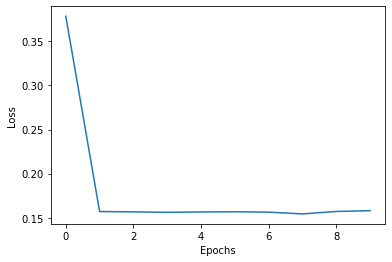

In [17]:
plt.plot(history.history['loss'])

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

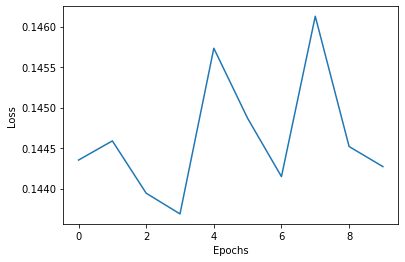

In [18]:
plt.plot(history.history['val_loss'])

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [19]:
model.save('12_Epoch_Model.h5')

In [22]:
model = load_model('12_Epoch_Model.h5')